# Exercise 2: plot time series of temperature and salinity 

The goal of the exercise it to read data from a mooring located in the [Ibiza Channel](http://socib.es/?seccion=observingFacilities&facility=mooring&id=146) and represent the temperature and salinity corresponding to December 2015. 

## Import packages

Add packages that you will need:
* netCDF to read the data file
* numpy 
* ...

In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
# to have the figure inside the notebook
%matplotlib inline 

# Read data

Browse the [thredds directory](http://thredds.socib.es/thredds/catalog/mooring/conductivity_and_temperature_recorder/buoy_canaldeibiza-scb_sbe37006/catalog.html) to find the correct file.

Copy and paste below the data URL.

**Hint:** the link should be something like: http://thredds.socib.es /thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_canaldeibiza-scb_sbe37006/ ... nc

In [2]:
datafile = "http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_canaldeibiza-scb_sbe37006/L1/2015/dep0003_buoy-canaldeibiza_scb-sbe37006_L1_2015-12.nc"

## Read variables

The variables to be used are:
* temperature
* salinity
* time

To avoid to have to close the file, use the contruction [with ... as ...](https://docs.python.org/2/reference/compound_stmts.html#the-with-statement). <br>
There is an example in the notebook: *Data_ReadWrite/read_netcdf_opendap.ipynb* 

**Comment:** there are many ways to find the variable name, for example browsing the [thredds catalog](http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_canaldeibiza-scb_sbe37006/L1/2015/dep0003_buoy-canaldeibiza_scb-sbe37006_L1_2015-12.nc.html).<br>
Another possibility is to generate a list of variable names (nc.variables).

In [8]:
with netCDF4.Dataset(datafile) as nc:
    temperature = nc.variables['WTR_TEM_SBE37'][:]
    salinity = nc.variables['SALT_SBE37'][:]
    stationtime = nc.variables['time'][:]

**Comment:** we set the name of the time array as *stationtime* in order to avoid confusion with the [time module](https://docs.python.org/2/library/time.html).

Check the dimension of the arrays where the data are stored.

In [10]:
print temperature.shape
print salinity.shape
print stationtime.shape

(744,)
(744,)
(744,)


# Make the plot

The figure will be made up of two subplot, one over the other.<br>
See examples in the notebook *Plotting/plot_subfigure.ipynb*.

## 1st plot: basic plot

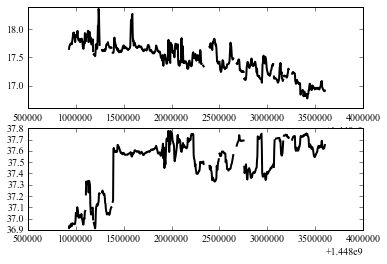

In [13]:
fig = plt.figure()
ax = plt.subplot(211)
plt.plot(stationtime, temperature)
ax = plt.subplot(212)
plt.plot(stationtime, salinity)
plt.show()
plt.close()

## 2nd plot: improved plot

Create a new figure adding:
* a title
* x- and ylabels
* the units.

**Hint:** use change the [*num2date*](http://netcdf4-python.googlecode.com/svn/trunk/docs/netcdftime.netcdftime-module.html#num2date) function to change time format using the *units* attribute of the variable.

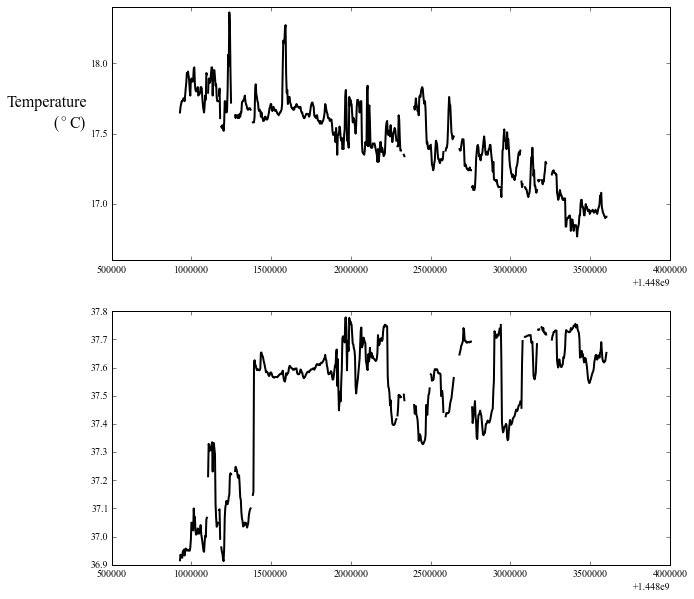

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(211)
plt.plot(stationtime, temperature)
plt.ylabel('Temperature\n($^{\circ}$C)', horizontalalignment='right', rotation=0, fontsize=16)
ax = plt.subplot(212)
plt.plot(stationtime, salinity)
plt.ylabel('Salinity\n($^{\circ}$C)', horizontalalignment='right', rotation=0, fontsize=16)

plt.show()
plt.close()

# Subsidiary questions

## cf-python

Instead of using netcdf4 to read the file, use [cf-python](http://cfpython.bitbucket.org/).
You may have to install it on your machine.

## Min and max values

Compute the dates when the minimal and maximal values of salinity occur.